KFolds with XGB to analyse best feats

In [3]:
from xgboost import XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from tqdm import tqdm


from xgb_utils import cal_mean_errors
from xgb_params import xgb_params, xgb_params_inv, xgb_params_own

In [4]:
# CHANGE FILES/PARAMS TO USE
params = xgb_params
file_name = 'Onehot_only_mean_NANs_modified_prices.csv'
feats_output_path = './best_feats/' + file_name

# For whole dataset
data_set_path = '../../Dataset/train.csv/train.csv'

# For investment only dataset
# data_set_path = 'processed/train_inv.csv'

# For investment only dataset
# data_set_path = 'processed/train_own.csv'

params

{'n_estimators': 300,
 'device': 'cuda',
 'objective': 'reg:squarederror',
 'eval_metric': 'rmsle',
 'enable_categorical': True,
 'early_stopping_rounds': 20,
 'colsample_bytree': 0.7,
 'eta': 0.05,
 'gamma': 8.084029345968737,
 'max_depth': 6,
 'min_child_weight': 2.0,
 'reg_alpha': 93.0,
 'reg_lambda': 0.8685796539747039,
 'n_jobs': 4}

In [5]:
# Import train data
train_df = pd.read_csv(data_set_path)

In [6]:

model1 =  XGBRegressor(
                    # verbosity=0,
                    n_estimators=params['n_estimators'],
                    device=params['device'],
                    objective=params['objective'],
                    eval_metric=params['eval_metric'],
                    enable_categorical=params['enable_categorical'],
                    early_stopping_rounds=params['early_stopping_rounds'],

                    eta=params['eta'],
                    max_depth =params['max_depth'],
                    # gamma = params['gamma'],
                    # reg_alpha = params['reg_alpha'],
                    # min_child_weight=params['min_child_weight'],
                    colsample_bytree=params['colsample_bytree'],
                    n_jobs=params['n_jobs']
                )

model2 = XGBRegressor(
                    # verbosity=0,
                    n_estimators=params['n_estimators'],
                    device=params['device'],
                    objective=params['objective'],
                    eval_metric=params['eval_metric'],
                    enable_categorical=params['enable_categorical'],
                    early_stopping_rounds=params['early_stopping_rounds'],

                    eta=params['eta'],
                    max_depth = 6, #params['max_depth'],
                    # gamma = params['gamma'],
                    # reg_alpha = params['reg_alpha'],
                    # min_child_weight=params['min_child_weight'],
                    colsample_bytree=params['colsample_bytree'],
                    n_jobs=params['n_jobs']
                )

models = [model1] #, model2]

rmsles, most_important_features = cal_mean_errors(train_df, models)

0it [00:00, ?it/s]

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [7]:
rmsles = np.array(rmsles)
print(rmsles)

[2659860.86924427]


In [8]:
for features in most_important_features:
    display(features.head(10))

,col_name,feature_importance_vals
0,full_sq,1.476434e+06
257,cafe_count_5000_price_2500,3.079722e+05
5,num_room,2.875560e+05
259,cafe_count_5000_price_high,1.913774e+05
226,cafe_count_3000,1.608472e+05
203,cafe_count_2000,1.554926e+05
2,floor,1.230690e+05
1,life_sq,1.216467e+05
7,state,1.172546e+05
4,build_year,1.005980e+05


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


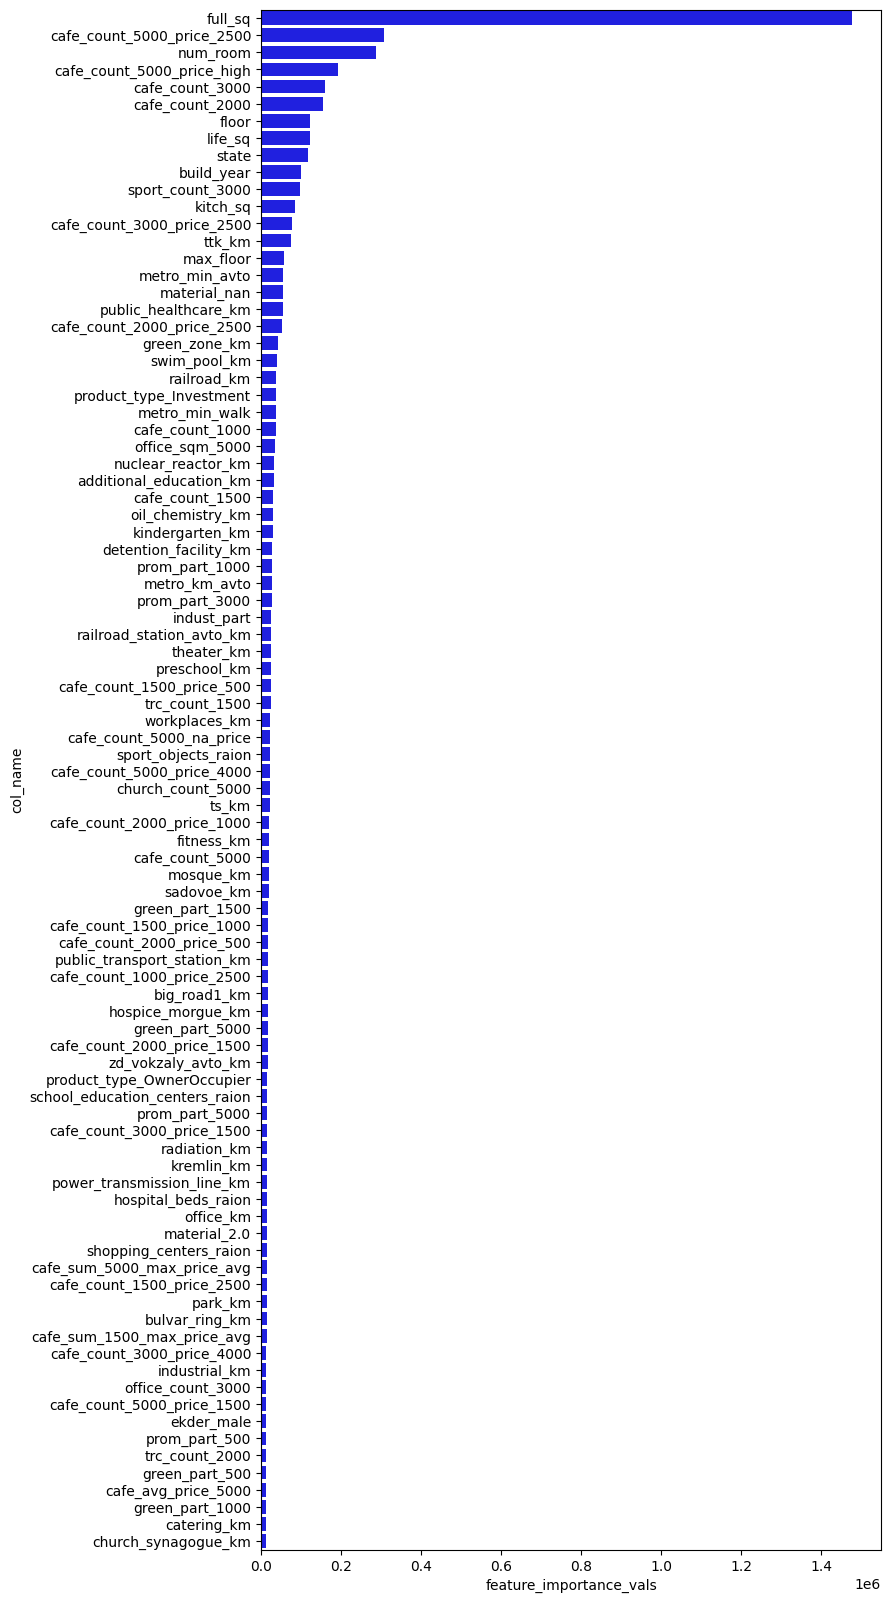

In [9]:
limit = 90
for feats in most_important_features:
    plt.figure(figsize=(8, 20))
    sns.barplot(x="feature_importance_vals", y="col_name", data=feats.iloc[:limit],
            color="b")

In [10]:
# Save best feats to csv
most_important_features[0].to_csv(feats_output_path, index=False)